# Course Project DataScience_Anish Karnik

## Project goal
Analyze the mushroom dataset to determine which factors make a mushroom more likely to be
poisonous.


In [644]:
# import all necessary libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
df = pd.read_csv('mushroom.csv')
df.head()


,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,e,x,s,u,NaN,NaN,w,d,a,7.59,4.45,15.67
1,p,x,e,e,NaN,NaN,y,d,a,7.40,8.05,10.45
2,p,f,l,n,NaN,NaN,n,d,u,4.09,5.43,5.07
3,e,x,t,n,NaN,s,w,d,u,6.25,13.15,13.24
4,p,x,s,g,r,y,n,d,u,5.98,5.61,15.93


In [645]:
df.shape # number of rows (mushroom entries) and columns (mushroom identifying varibles)

(61069, 12)

In [646]:
df.describe(include= 'all')

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
count,61069,61069,46949,61069,9531,22945,61069,61069,61069,61069.000000,61069.000000,61069.000000
unique,2,7,11,12,5,8,13,8,4,NaN,NaN,NaN
top,p,x,t,n,s,s,w,d,a,NaN,NaN,NaN
freq,33888,26934,8196,24218,3177,6025,22926,44209,30177,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.733854,6.581538,12.149410
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.264845,3.370017,10.035955
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.380000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.480000,4.640000,5.210000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.860000,5.950000,10.190000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.540000,7.740000,16.570000


In [467]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   class         61069 non-null  object 
 1   cap-shape     61069 non-null  object 
 2   cap-surface   46949 non-null  object 
 3   cap-color     61069 non-null  object 
 4   stem-root     9531 non-null   object 
 5   stem-surface  22945 non-null  object 
 6   stem-color    61069 non-null  object 
 7   habitat       61069 non-null  object 
 8   season        61069 non-null  object 
 9   cap-diameter  61069 non-null  float64
 10  stem-height   61069 non-null  float64
 11  stem-width    61069 non-null  float64
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


# 1. Univariate descriptive summaries:
Pick two categorical and two continuous variables
that are not class. Describe their distributions using summary statistics and
visualizations.


Selecting stem-height and stem-width as continous variables and cap-shape and cap color as categorical variable

In [468]:
df['stem-height'].describe()

count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem-height, dtype: float64

In [469]:
df['stem-height'].value_counts()

stem-height
0.00     1059
5.24      153
5.92      142
5.32      140
5.99      140
         ... 
24.45       1
19.89       1
30.40       1
24.36       1
27.69       1
Name: count, Length: 2226, dtype: int64

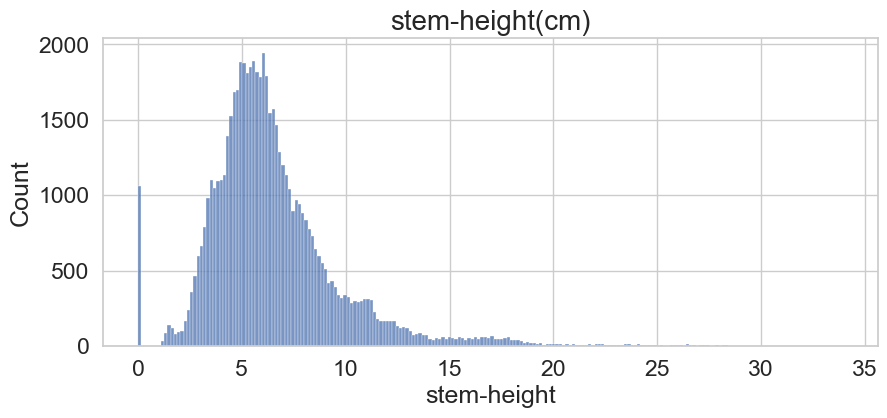

In [470]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['stem-height'] , data=df , kde= False)
plt.title('stem-height(cm)', fontsize=20)
plt.show();


In [471]:
df['stem-width'].describe()

count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem-width, dtype: float64

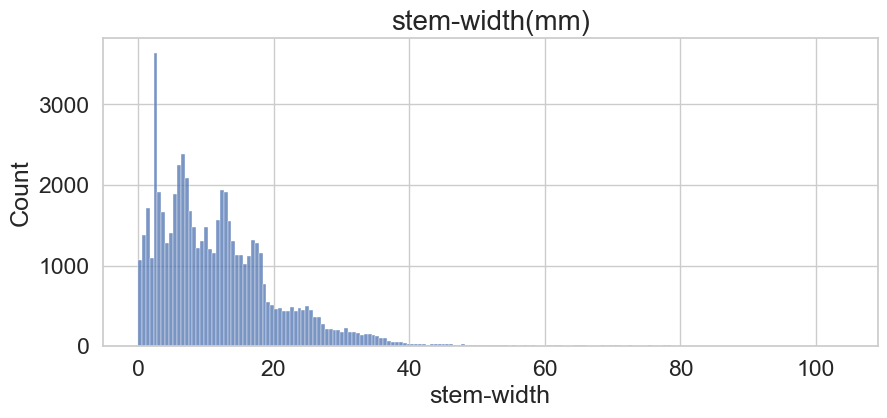

In [472]:
plt.figure(figsize=(10,4))
sns.histplot(x=df['stem-width'] , data=df, kde= False)
plt.title('stem-width(mm)', fontsize=20)
plt.show()


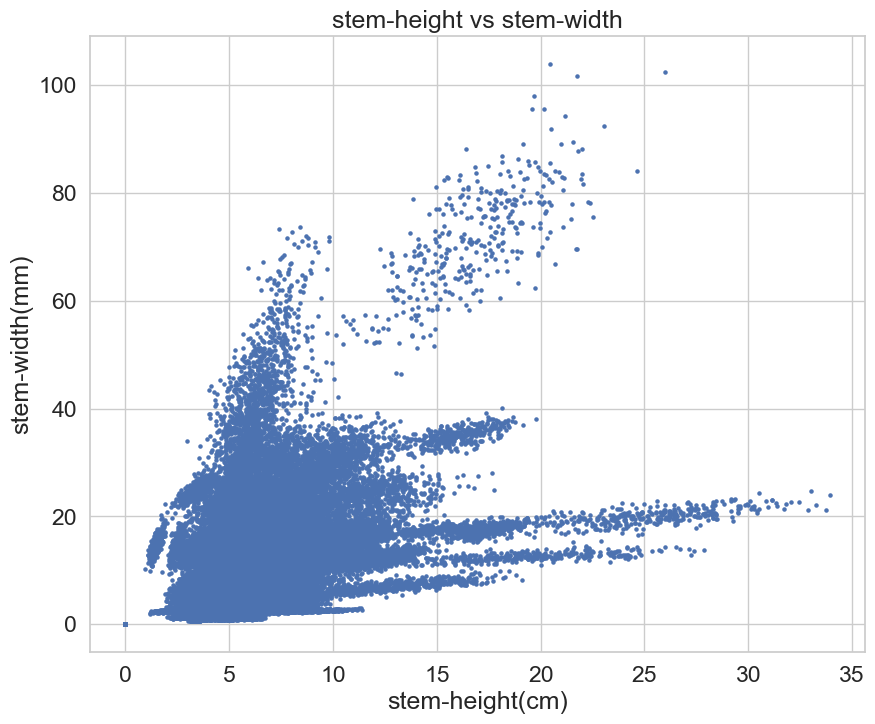

In [473]:
plt.figure()
plt.scatter(df['stem-height'], df['stem-width'], s= 5, alpha = 1)
plt.xlabel('stem-height(cm)')
plt.ylabel('stem-width(mm)')
plt.title('stem-height vs stem-width')
plt.show()

In [474]:
df['cap-shape'].describe()

count     61069
unique        7
top           x
freq      26934
Name: cap-shape, dtype: object

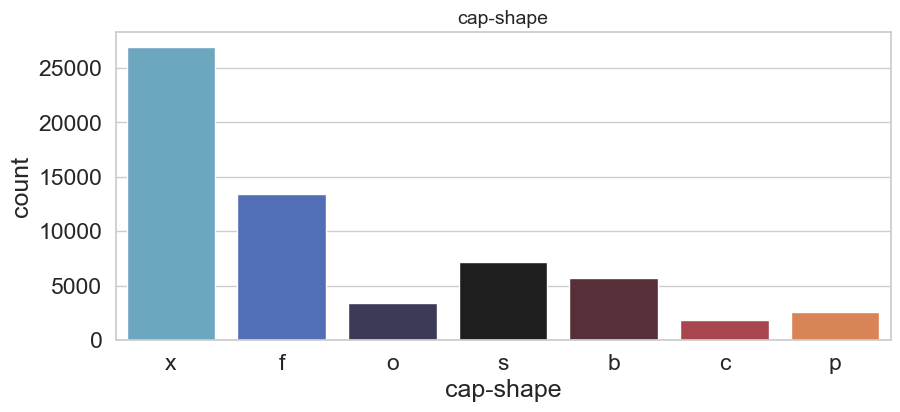

% of total:
cap-shape
x    44.10
f    21.95
s    11.73
b     9.32
o     5.67
p     4.25
c     2.97
Name: count, dtype: float64


In [475]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['cap-shape'] , data=df ,palette='icefire')
plt.title('cap-shape', fontsize=14)
plt.show()
print("% of total:")
print(round((df['cap-shape'].value_counts()/df.shape[0]),4)*100)

majority of cap-shape are convex (x) followed by flat shapes (f)

In [476]:
df['cap-color'].describe()

count     61069
unique       12
top           n
freq      24218
Name: cap-color, dtype: object

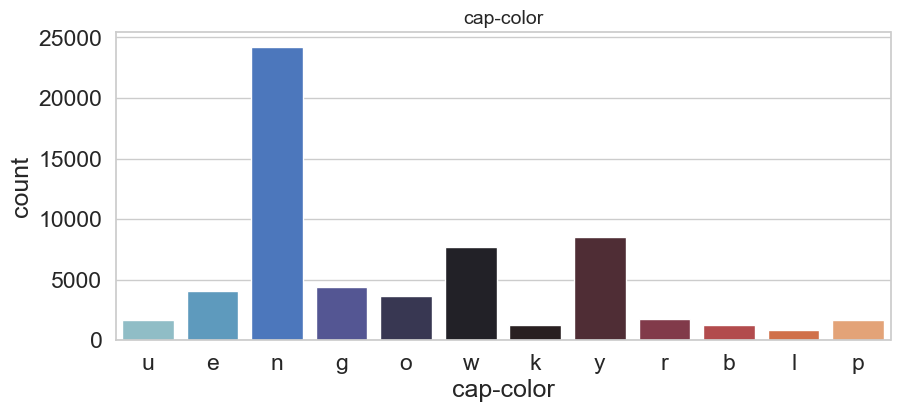

% of total:
cap-color
n    39.66
y    13.99
w    12.55
g     7.24
e     6.61
o     5.99
r     2.92
u     2.80
p     2.79
k     2.09
b     2.01
l     1.36
Name: count, dtype: float64


In [477]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['cap-color'] , data=df ,palette='icefire')
plt.title('cap-color', fontsize=14)
plt.show()
print("% of total:")
print(round((df['cap-color'].value_counts()/df.shape[0]),4)*100)

Most cap-colors are  brown (n) folowed by yellow (y)

# # Extra "All distributions anlysis"

In [652]:
# indiviual number of entries for each variable

M_cols = df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",df[col].value_counts(),"\n\n")  

Value Distribution:

class 
 class
p    33888
e    27181
Name: count, dtype: int64 


cap-shape 
 cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64 


cap-surface 
 cap-surface
t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: count, dtype: int64 


cap-color 
 cap-color
n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64 


stem-root 
 stem-root
s    3177
b    3177
r    1412
f    1059
c     706
Name: count, dtype: int64 


stem-surface 
 stem-surface
s    6025
y    4940
i    4396
t    2644
g    1765
k    1581
f    1059
h     535
Name: count, dtype: int64 


stem-color 
 stem-color
w    22926
n    18063
y     7865
g     2626
o     2187
e     2050
u     1490
f     1059
p     1025
k      837
r      542
l      226
b      173
Name: count, dtype: int64 


habi

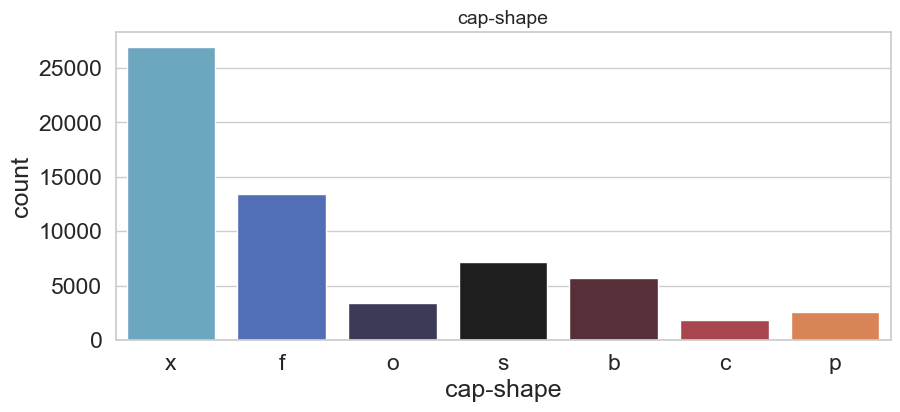

% of total:
cap-shape
x    44.10
f    21.95
s    11.73
b     9.32
o     5.67
p     4.25
c     2.97
Name: count, dtype: float64


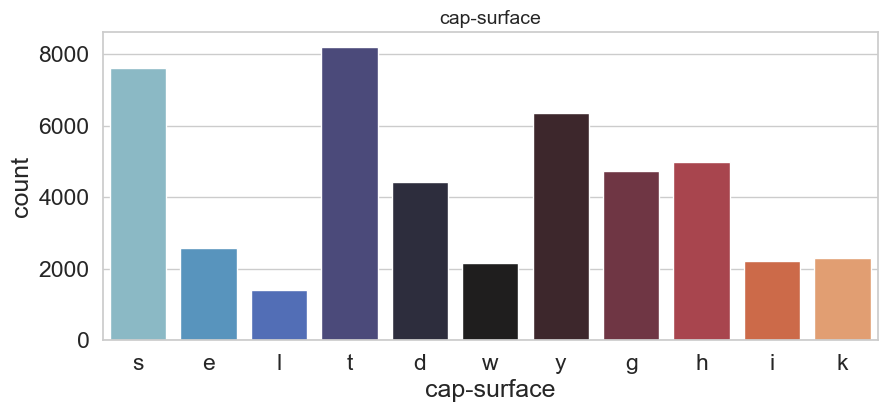

% of total:
cap-surface
t    13.42
s    12.46
y    10.38
h     8.14
g     7.74
d     7.26
e     4.23
k     3.77
i     3.64
w     3.52
l     2.31
Name: count, dtype: float64


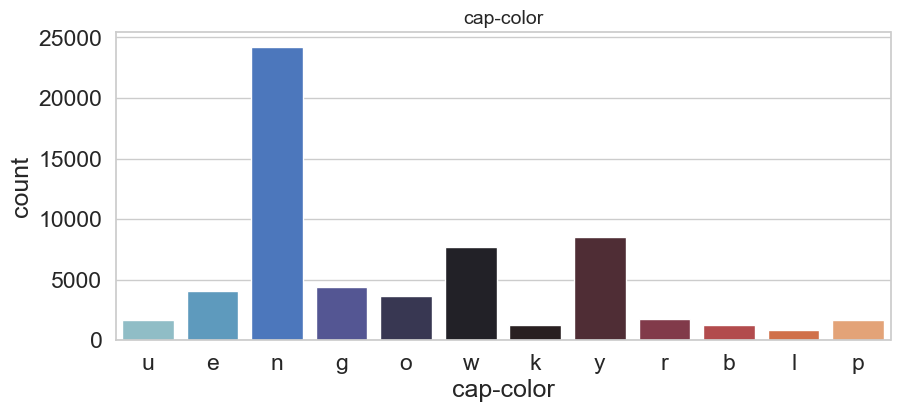

% of total:
cap-color
n    39.66
y    13.99
w    12.55
g     7.24
e     6.61
o     5.99
r     2.92
u     2.80
p     2.79
k     2.09
b     2.01
l     1.36
Name: count, dtype: float64


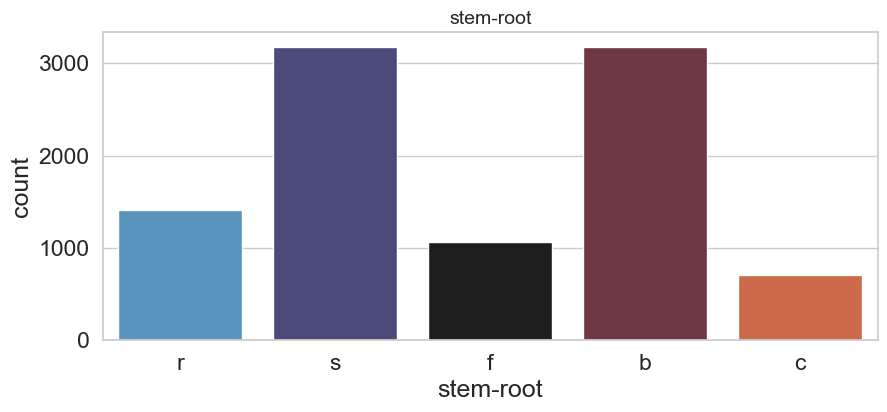

% of total:
stem-root
s    5.20
b    5.20
r    2.31
f    1.73
c    1.16
Name: count, dtype: float64


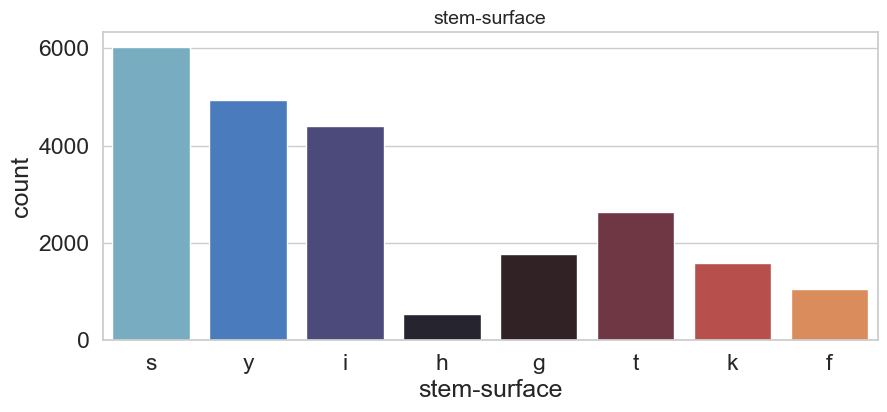

% of total:
stem-surface
s    9.87
y    8.09
i    7.20
t    4.33
g    2.89
k    2.59
f    1.73
h    0.88
Name: count, dtype: float64


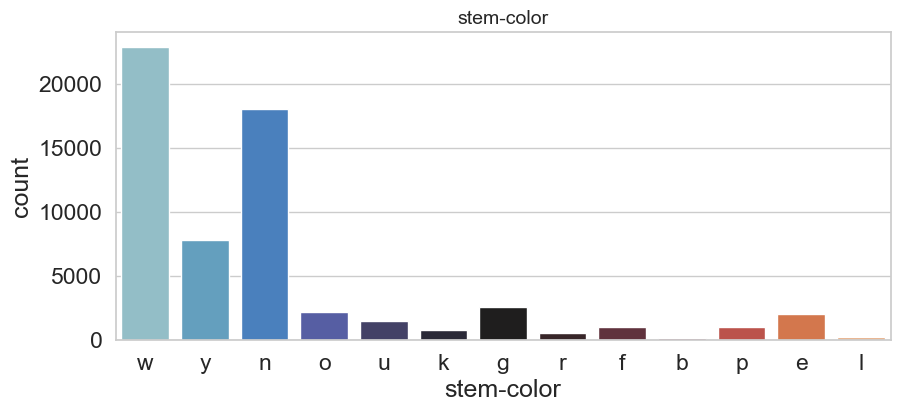

% of total:
stem-color
w    37.54
n    29.58
y    12.88
g     4.30
o     3.58
e     3.36
u     2.44
f     1.73
p     1.68
k     1.37
r     0.89
l     0.37
b     0.28
Name: count, dtype: float64


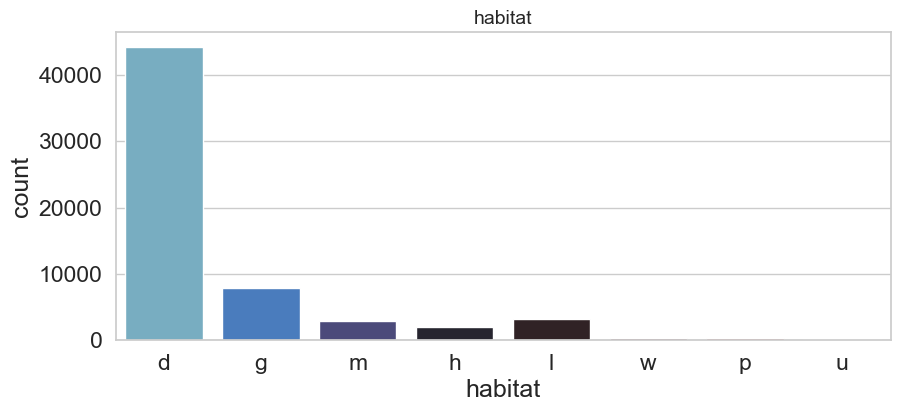

% of total:
habitat
d    72.39
g    13.01
l     5.19
m     4.78
h     3.28
p     0.59
w     0.58
u     0.19
Name: count, dtype: float64


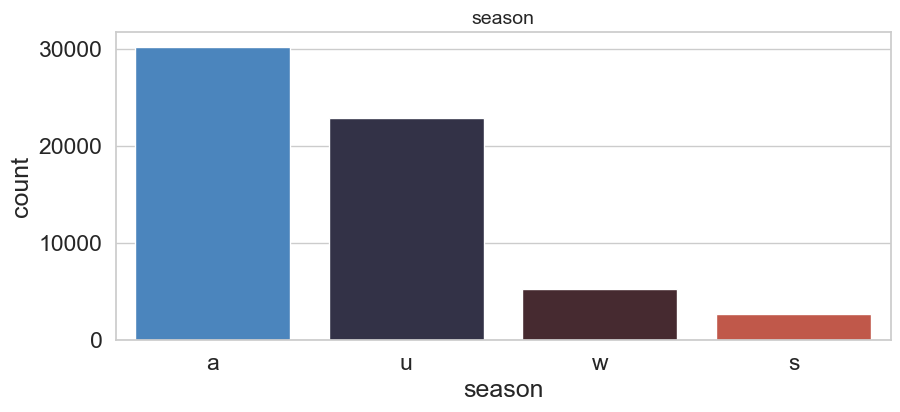

% of total:
season
a    49.41
u    37.50
w     8.62
s     4.47
Name: count, dtype: float64


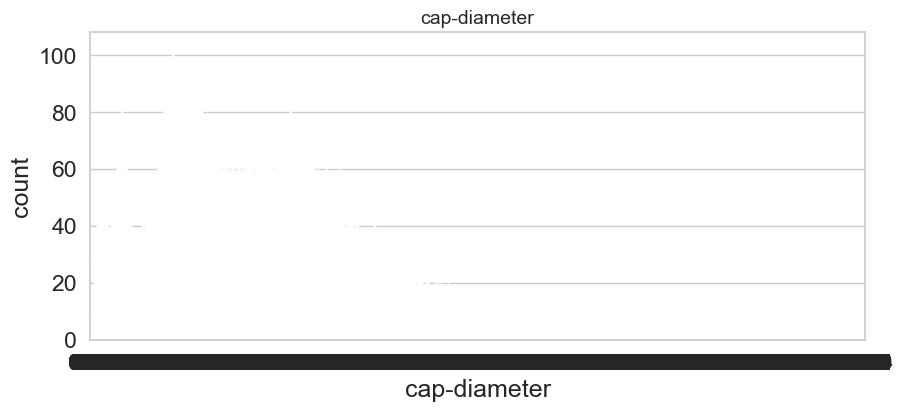

% of total:
cap-diameter
3.18     0.17
3.14     0.16
3.13     0.16
3.85     0.16
3.25     0.16
         ... 
45.78    0.00
55.10    0.00
25.12    0.00
50.76    0.00
55.94    0.00
Name: count, Length: 2571, dtype: float64


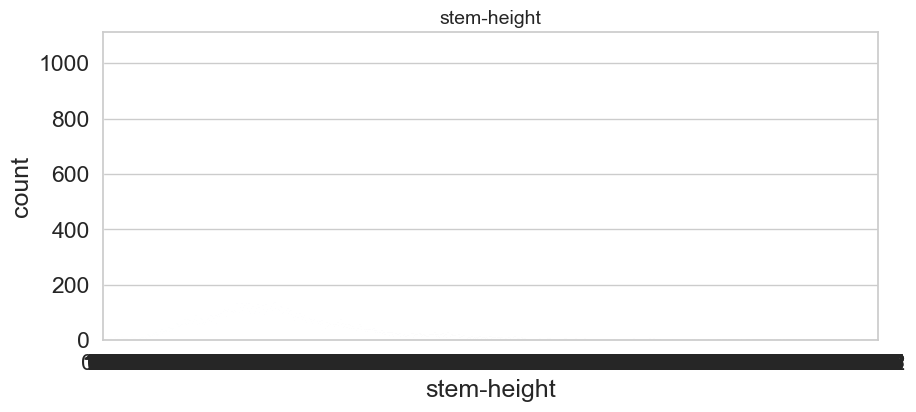

% of total:
stem-height
0.00     1.73
5.24     0.25
5.92     0.23
5.32     0.23
5.99     0.23
         ... 
24.45    0.00
19.89    0.00
30.40    0.00
24.36    0.00
27.69    0.00
Name: count, Length: 2226, dtype: float64


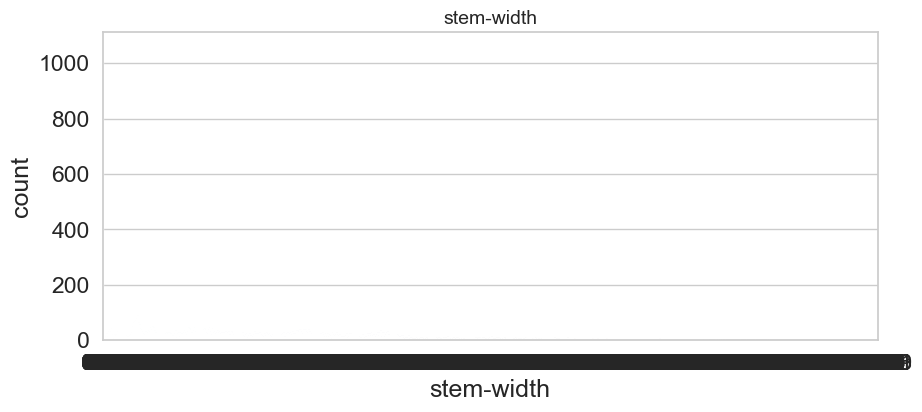

% of total:
stem-width
0.00     1.73
2.41     0.16
2.45     0.16
2.60     0.15
2.49     0.15
         ... 
71.04    0.00
49.17    0.00
52.69    0.00
34.11    0.00
55.62    0.00
Name: count, Length: 4630, dtype: float64


In [653]:
# for plotting all variable distribution
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((df[col].value_counts()/df.shape[0]),4)*100)


#  2.Missing data:
Describe the patterns of missingness in the data. How often are
observations missing for each variable? Does missingness tend to co-occur among the
variables?

In [647]:
df.isna()

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,False,False,False,False,True,False,False,False,False,False,False,False
61065,False,False,True,False,True,True,False,False,False,False,False,False
61066,False,False,False,False,True,False,False,False,False,False,False,False
61067,False,False,False,False,True,True,False,False,False,False,False,False


In [651]:
df.isna().sum()

class               0
cap-shape           0
cap-surface     14120
cap-color           0
stem-root       51538
stem-surface    38124
stem-color          0
habitat             0
season              0
cap-diameter        0
stem-height         0
stem-width          0
dtype: int64

Missing entries in cap-surface, stem-root  and stem-surface

Highest missing entries in stem-root category

In [480]:
df.duplicated().sum()

150

# 3.Feature-outcome relationships: 

For the same variables as in question 1, assess their
relationship with the outcome variable class using appropriate summary statistics and visualizations.


Categorical variable: cap-shape and cap color

Continuous Variable: stem-height and stem-width

Class: p or e

In [481]:
df.sort_values('class')

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,e,x,s,u,NaN,NaN,w,d,a,7.59,4.45,15.67
32880,e,o,NaN,n,NaN,NaN,n,d,a,9.38,5.36,24.72
32882,e,s,NaN,n,b,NaN,u,d,w,9.10,6.76,20.21
32885,e,x,s,u,NaN,NaN,w,d,u,9.77,7.75,24.50
32886,e,x,NaN,w,b,NaN,w,d,u,6.85,6.15,12.79
...,...,...,...,...,...,...,...,...,...,...,...,...
34440,p,x,t,n,NaN,y,n,d,w,6.24,5.58,6.85
34441,p,c,NaN,w,NaN,i,w,p,u,2.03,3.84,3.47
34442,p,b,y,n,s,s,w,d,u,3.80,5.63,4.45
11842,p,s,NaN,n,NaN,NaN,n,d,a,5.08,6.82,6.65


In [482]:
grouped = df.groupby('class')
grouped.head()

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,e,x,s,u,NaN,NaN,w,d,a,7.59,4.45,15.67
1,p,x,e,e,NaN,NaN,y,d,a,7.40,8.05,10.45
2,p,f,l,n,NaN,NaN,n,d,u,4.09,5.43,5.07
3,e,x,t,n,NaN,s,w,d,u,6.25,13.15,13.24
4,p,x,s,g,r,y,n,d,u,5.98,5.61,15.93
5,p,f,NaN,o,NaN,NaN,o,g,u,0.80,4.58,1.08
6,e,x,s,w,NaN,NaN,w,m,w,2.94,2.93,5.27
7,p,f,NaN,w,r,i,w,h,a,9.19,11.14,12.36
9,e,o,NaN,n,NaN,NaN,n,l,s,6.18,5.35,21.85
10,e,f,w,g,NaN,NaN,w,d,w,1.50,4.77,2.58


In [483]:
grouped.agg(len)

,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
class,,,,,,,,,,,
e,27181,27181,27181,27181,27181,27181,27181,27181,27181,27181,27181
p,33888,33888,33888,33888,33888,33888,33888,33888,33888,33888,33888


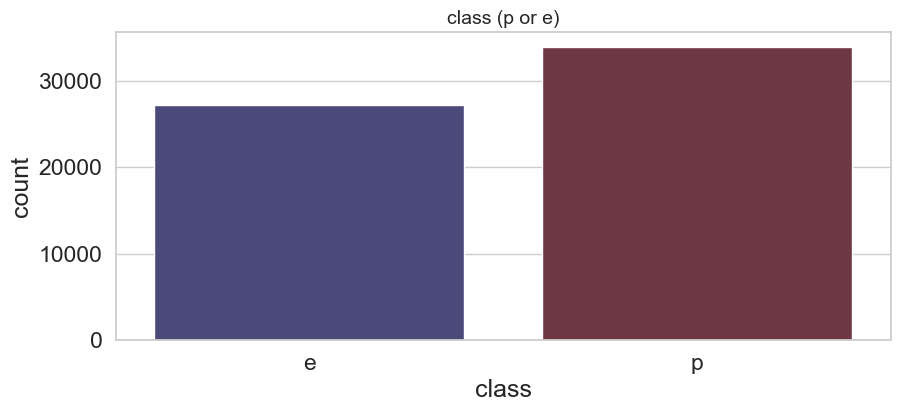

% of total:
class
p    55.49
e    44.51
Name: count, dtype: float64


In [484]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['class'] , data=df ,palette='icefire')
plt.title('class (p or e)', fontsize=14)
plt.show()
print("% of total:")
print(round((df['class'].value_counts()/df.shape[0]),4)*100)

More number of poisonus mushrooms(p) than edible mushrooms (e) in the data set 

In [485]:
# cap-shape variable vs class
print("cap-shape category")
grouped['cap-shape'].describe()

cap-shape category


,count,unique,top,freq
class,,,,
e,27181,7,x,12960
p,33888,7,x,13974


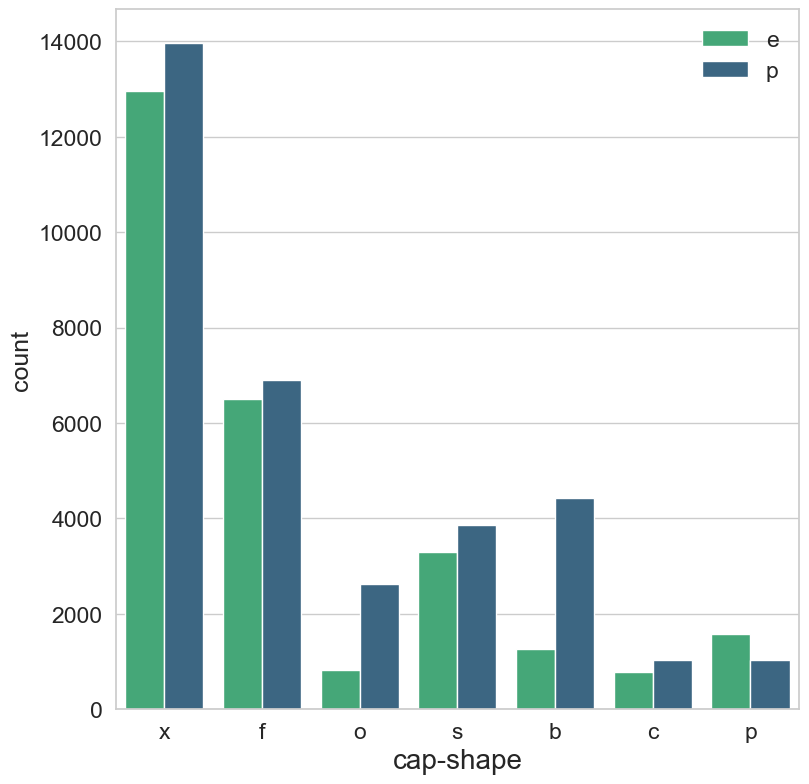

In [486]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
sns.countplot(x=df['cap-shape'] ,hue='class', data=df ,palette='viridis_r')
plt.xlabel('cap-shape', fontsize=20)
plt.legend(loc='upper right')
plt.show()

cap-shape - Most of the convex shaped (x) mushrooms in our dataset are poisonous.

In [487]:
# cap-color vs class
print("cap-color category")
grouped['cap-color'].describe()

cap-color category


,count,unique,top,freq
class,,,,
e,27181,12,n,12407
p,33888,12,n,11811


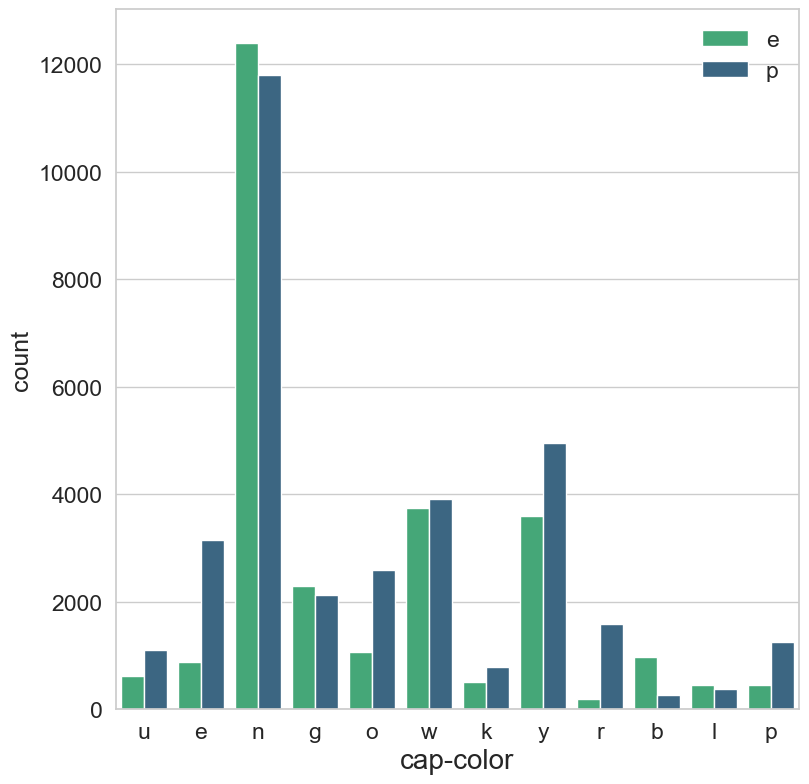

In [488]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
sns.countplot(x=df['cap-color'] ,hue='class', data=df ,palette='viridis_r')
plt.xlabel('cap-color', fontsize=20)
plt.legend(loc='upper right')
plt.show()

cap-color - Most brown (n) cap colored mushrooms are poisonous.

In [489]:
# stem-height vs class
grouped['stem-height'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
e,27181.0,7.039077,3.583433,2.0,5.08,6.24,7.74,33.92
p,33888.0,6.214554,3.140778,0.0,4.21,5.63,7.74,20.19


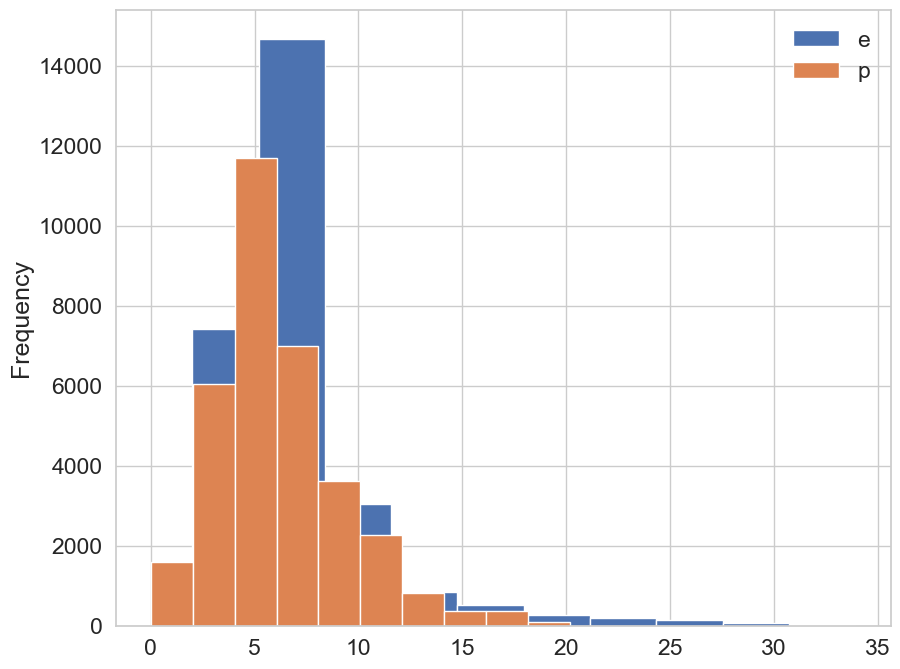

In [490]:
grouped['stem-height'].plot(kind='hist', legend ='True');

In [491]:
# stem-width (mm) vs class
grouped['stem-width'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
e,27181.0,14.361084,11.042703,0.74,7.13,12.59,18.39,103.91
p,33888.0,10.375463,8.753975,0.00,3.58,7.66,14.34,58.95


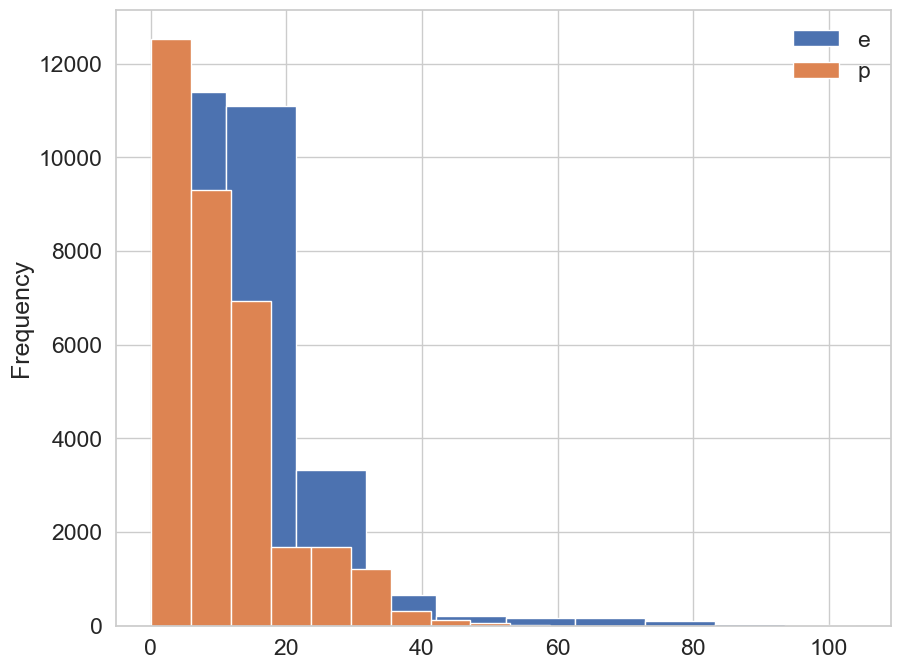

In [493]:
grouped['stem-width'].plot(kind='hist', legend ='True');

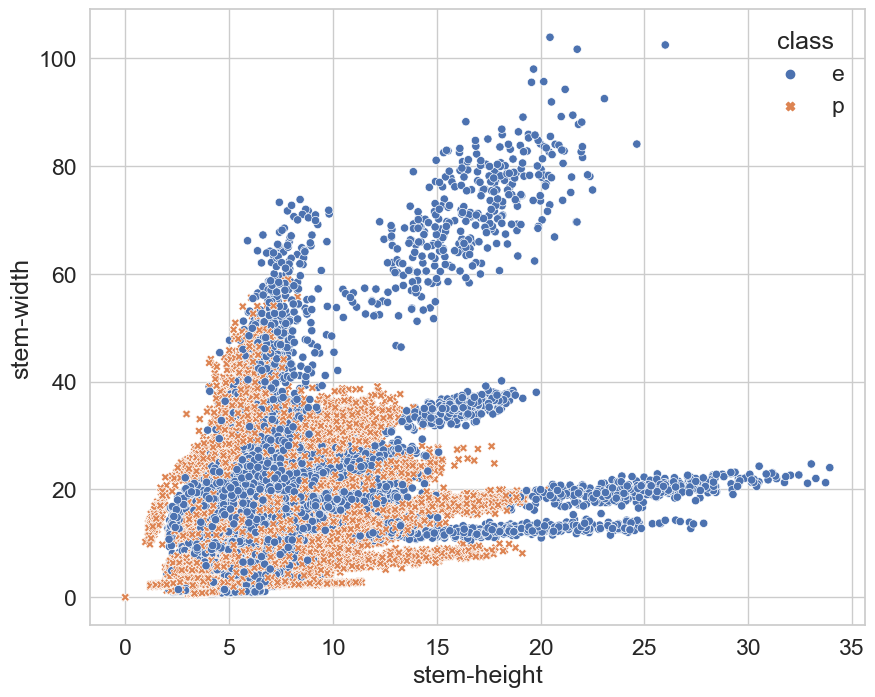

In [494]:
sns.scatterplot(df, x="stem-height", y="stem-width", hue ="class", style ="class");


stem-height< 21 cm and stem-width< 60 mm have all the poisonous mushrooms 
in the data set

# Conclusion

Based on the above anlysis if the mushroom has cap-color brown (n) and cap-shape convex (x)  with stem-height less than 21 cm and stem-width less than 60 mm. The mushroom has a very highly likable possibility that it is poisonous and not edible.

# 4.Predictive modeling: 
Fit a model to predict class from other variables in the dataset.
Using a training-test split, assess the model’s performance.


In [639]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, tree, datasets, feature_selection
from seaborn import pairplot, heatmap
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('mushroom.csv')

#copy dataset
df_model=df
df_model

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,e,x,s,u,NaN,NaN,w,d,a,7.59,4.45,15.67
1,p,x,e,e,NaN,NaN,y,d,a,7.40,8.05,10.45
2,p,f,l,n,NaN,NaN,n,d,u,4.09,5.43,5.07
3,e,x,t,n,NaN,s,w,d,u,6.25,13.15,13.24
4,p,x,s,g,r,y,n,d,u,5.98,5.61,15.93
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,x,i,n,NaN,i,n,g,a,7.68,7.90,7.57
61065,p,f,NaN,w,NaN,NaN,p,d,u,3.04,6.87,3.62
61066,p,x,g,y,NaN,s,n,h,u,1.24,2.00,2.35
61067,p,c,k,y,NaN,NaN,w,d,s,5.15,6.55,12.64


In [640]:

# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

for column in df_model.columns:
    df_model[column] = labelencoder.fit_transform(df_model[column])

df_model

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
0,0,6,7,9,5,8,11,0,0,714,335,1514
1,1,6,1,1,5,8,12,0,0,695,695,992
2,1,2,6,5,5,8,6,0,2,364,433,454
3,0,6,8,5,5,5,11,0,2,580,1205,1271
4,1,6,7,2,3,7,6,0,2,553,451,1540
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,6,4,5,5,3,6,1,0,723,680,704
61065,1,2,11,10,5,8,8,0,2,259,577,309
61066,1,6,2,11,5,5,6,2,2,79,90,182
61067,1,1,5,11,5,8,11,0,1,470,545,1211


e is 0 and p is 1

In [641]:
df_model.corr()

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season,cap-diameter,stem-height,stem-width
class,1.000000,-0.106309,-0.032972,0.026411,-0.010759,-0.174271,-0.094772,-0.041923,-0.054046,-0.184392,-0.114163,-0.196443
cap-shape,-0.106309,1.000000,-0.045788,0.016312,-0.026065,0.123515,0.009061,-0.124754,-0.027178,0.145007,0.036897,0.168908
cap-surface,-0.032972,-0.045788,1.000000,0.096224,-0.108252,-0.033085,0.123234,0.038583,-0.001213,0.014116,0.042361,0.066565
cap-color,0.026411,0.016312,0.096224,1.000000,0.113796,0.053859,0.265525,0.031706,0.008443,-0.000657,-0.016685,0.008528
stem-root,-0.010759,-0.026065,-0.108252,0.113796,1.000000,0.102831,0.041044,0.027186,-0.027253,-0.104390,-0.086696,-0.105175
stem-surface,-0.174271,0.123515,-0.033085,0.053859,0.102831,1.000000,0.247579,-0.017339,-0.042145,0.095775,0.121082,0.159744
stem-color,-0.094772,0.009061,0.123234,0.265525,0.041044,0.247579,1.000000,0.039917,-0.025461,0.049677,0.137514,0.083396
habitat,-0.041923,-0.124754,0.038583,0.031706,0.027186,-0.017339,0.039917,1.000000,0.004440,-0.137349,-0.033125,-0.117661
season,-0.054046,-0.027178,-0.001213,0.008443,-0.027253,-0.042145,-0.025461,0.004440,1.000000,0.029529,-0.020319,0.011433
cap-diameter,-0.184392,0.145007,0.014116,-0.000657,-0.104390,0.095775,0.049677,-0.137349,0.029529,1.000000,0.521886,0.803055


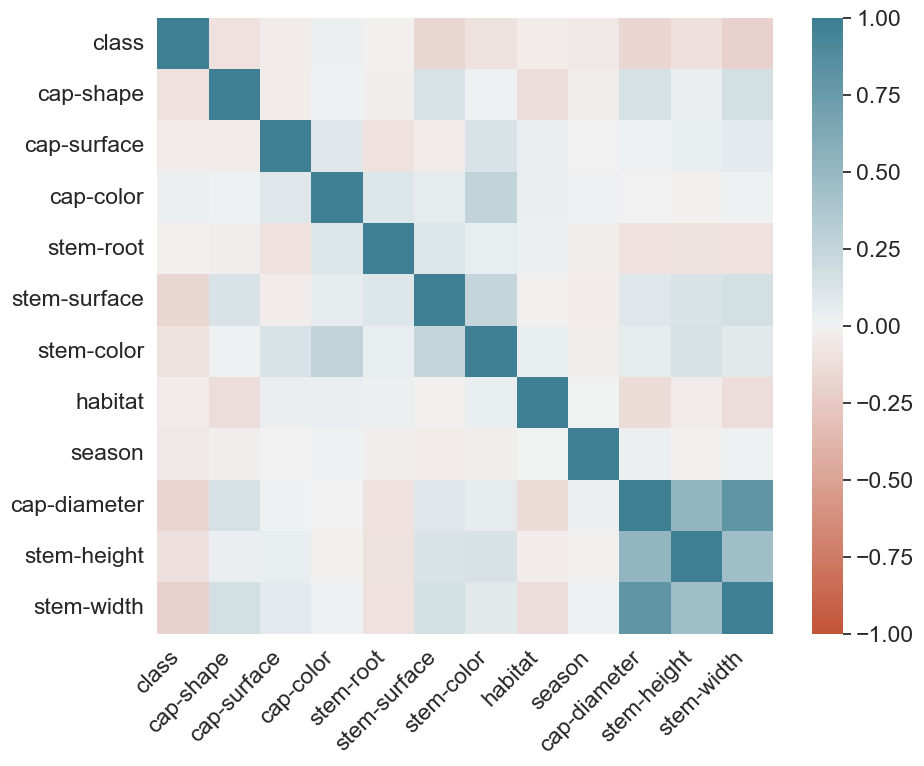

In [642]:
#show plot for corr()
corr = df_model.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

 # Logistical Regression

In [643]:
# dropping numerical variables 
df_model=df_model.drop(["cap-diameter","stem-height","stem-width"], axis=1)

df_model

,class,cap-shape,cap-surface,cap-color,stem-root,stem-surface,stem-color,habitat,season
0,0,6,7,9,5,8,11,0,0
1,1,6,1,1,5,8,12,0,0
2,1,2,6,5,5,8,6,0,2
3,0,6,8,5,5,5,11,0,2
4,1,6,7,2,3,7,6,0,2
...,...,...,...,...,...,...,...,...,...
61064,1,6,4,5,5,3,6,1,0
61065,1,2,11,10,5,8,8,0,2
61066,1,6,2,11,5,5,6,2,2
61067,1,1,5,11,5,8,11,0,1


In [608]:
df_model.dtypes

class           int32
cap-shape       int32
cap-surface     int32
cap-color       int32
stem-root       int32
stem-surface    int32
stem-color      int32
habitat         int32
season          int32
dtype: object

In [609]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = df_model["class"].values
# All data except "class" column.
x = df_model.drop(["class"], axis=1).values
# Split data for train and test.(75/25)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,)

In [610]:
x

array([[ 6,  7,  9, ..., 11,  0,  0],
       [ 6,  1,  1, ..., 12,  0,  0],
       [ 2,  6,  5, ...,  6,  0,  2],
       ...,
       [ 6,  2, 11, ...,  6,  2,  2],
       [ 1,  5, 11, ..., 11,  0,  1],
       [ 2,  8,  5, ...,  7,  0,  1]])

In [611]:
y

array([0, 1, 1, ..., 1, 1, 0])

In [612]:
from sklearn.linear_model import LogisticRegression


## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)


# We use the model to predict the test_encoded data
test_pred_class = lr.predict(x_test)
print("Test Accuracy:")
print(metrics.accuracy_score(y_test, test_pred_class))

Test Accuracy:
0.5869138066544407


# Decision Tree

In [613]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(max_depth =3, random_state =42)
dt.fit(x_train,y_train)





DecisionTreeClassifier(max_depth=3, random_state=42)

In [614]:
mush_cols = ['cap-shape', 'cap-surface', 'cap-color',
'stem-root', 'stem-surface', 'stem-color', 'habitat', 'season']


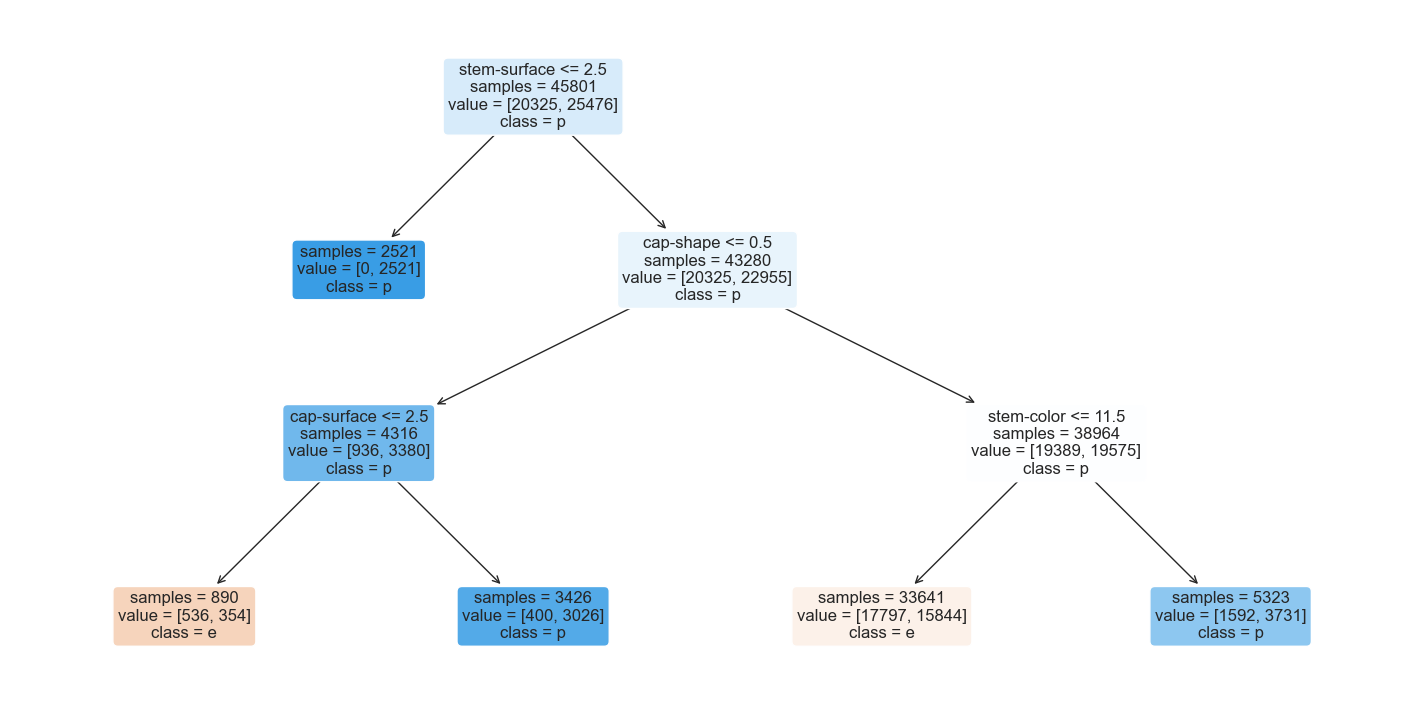

In [615]:
from sklearn.tree import plot_tree

# size for our tree figure
fig, ax = plt.subplots(figsize=(18, 9))

# Use sklearn's plot_tree() function
plot_tree(dt,
feature_names = mush_cols,
class_names = ['e', 'p'],
rounded=True,
impurity=False,
filled=True,
ax=ax,
fontsize=12);

In [616]:
from sklearn import metrics

# We use the model to predict the test_encoded data
test_pred_class = dt.predict(x_test)

print(metrics.accuracy_score(y_test, test_pred_class))

0.6039428870840975


Optimizing Models

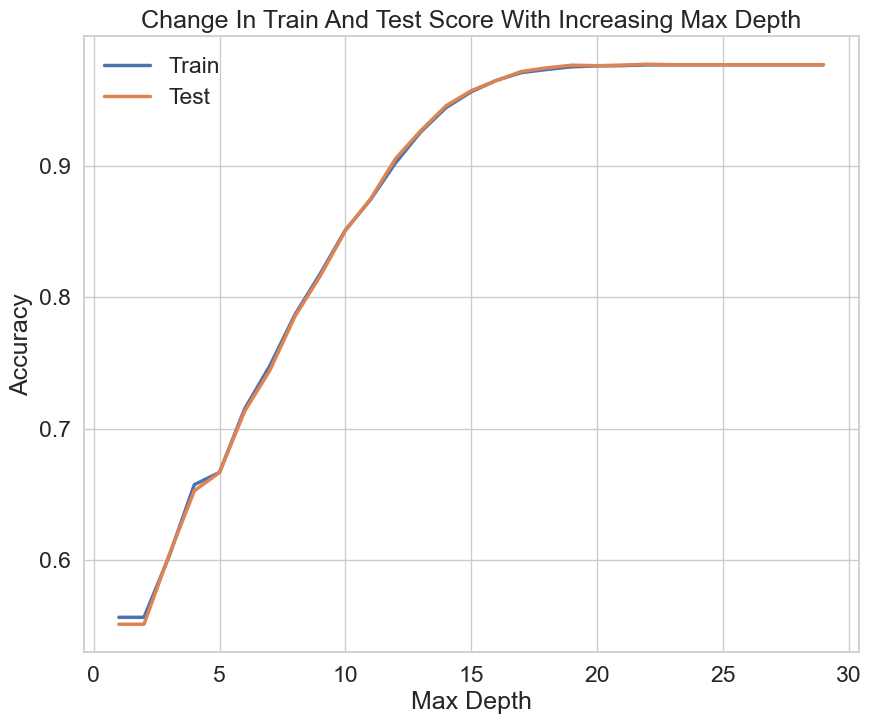

In [617]:
# Define a range of depth values to try
depth_values = range(1, 30)

# Create placeholder lists to append our scores to
train_scores = []
test_scores = []


# Loop through each depth value
for d in depth_values:

    # Create and fit a decision tree with that depth
    dt = tree.DecisionTreeClassifier(max_depth=d)
    dt.fit(x_train, y_train)

    # Calculate train and test accuracies
    train_acc = dt.score(x_train, y_train)
    test_acc = dt.score(x_test, y_test)

    # Append them to our lists
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    


# Let's plot this out

plt.figure()
plt.plot(depth_values, train_scores, label='Train')
plt.plot(depth_values, test_scores, label='Test')
plt.title("Change in train and test score with increasing Max Depth".title())
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

In [618]:
train_scores

[0.5562323966725617,
 0.5562323966725617,
 0.6028470994083098,
 0.6572782253662584,
 0.6666229994978276,
 0.7150062225715595,
 0.747843933538569,
 0.7868387153118928,
 0.8178860723564988,
 0.8511604550118993,
 0.8743477216654658,
 0.9025348791511102,
 0.926005982402131,
 0.9444335276522347,
 0.9565293334206677,
 0.9652191000196503,
 0.9711796685661885,
 0.9735376956835003,
 0.9755900526189385,
 0.9762887273203642,
 0.9764633959957206,
 0.977031069190629,
 0.9770965699438877,
 0.9770965699438877,
 0.9770965699438877,
 0.9770965699438877,
 0.9770965699438877,
 0.9770965699438877,
 0.9770965699438877]

In [619]:
test_scores

[0.5509562483625884,
 0.5509562483625884,
 0.6039428870840975,
 0.6526067592350013,
 0.6665575058946817,
 0.7132564841498559,
 0.7443018077023841,
 0.7854990830495153,
 0.8161514278228975,
 0.8506025674613571,
 0.8749017553052135,
 0.9057505894681687,
 0.9269714435420487,
 0.9458344249410532,
 0.957361802462667,
 0.9650903851192035,
 0.9720330102174483,
 0.9747838616714697,
 0.9768142520303904,
 0.9764212732512444,
 0.9768797484935814,
 0.9775347131254912,
 0.9772072308095363,
 0.9772072308095363,
 0.9772072308095363,
 0.9772072308095363,
 0.9772072308095363,
 0.9772072308095363,
 0.9772072308095363]

In [620]:
dt = tree.DecisionTreeClassifier(max_depth=6, random_state =42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

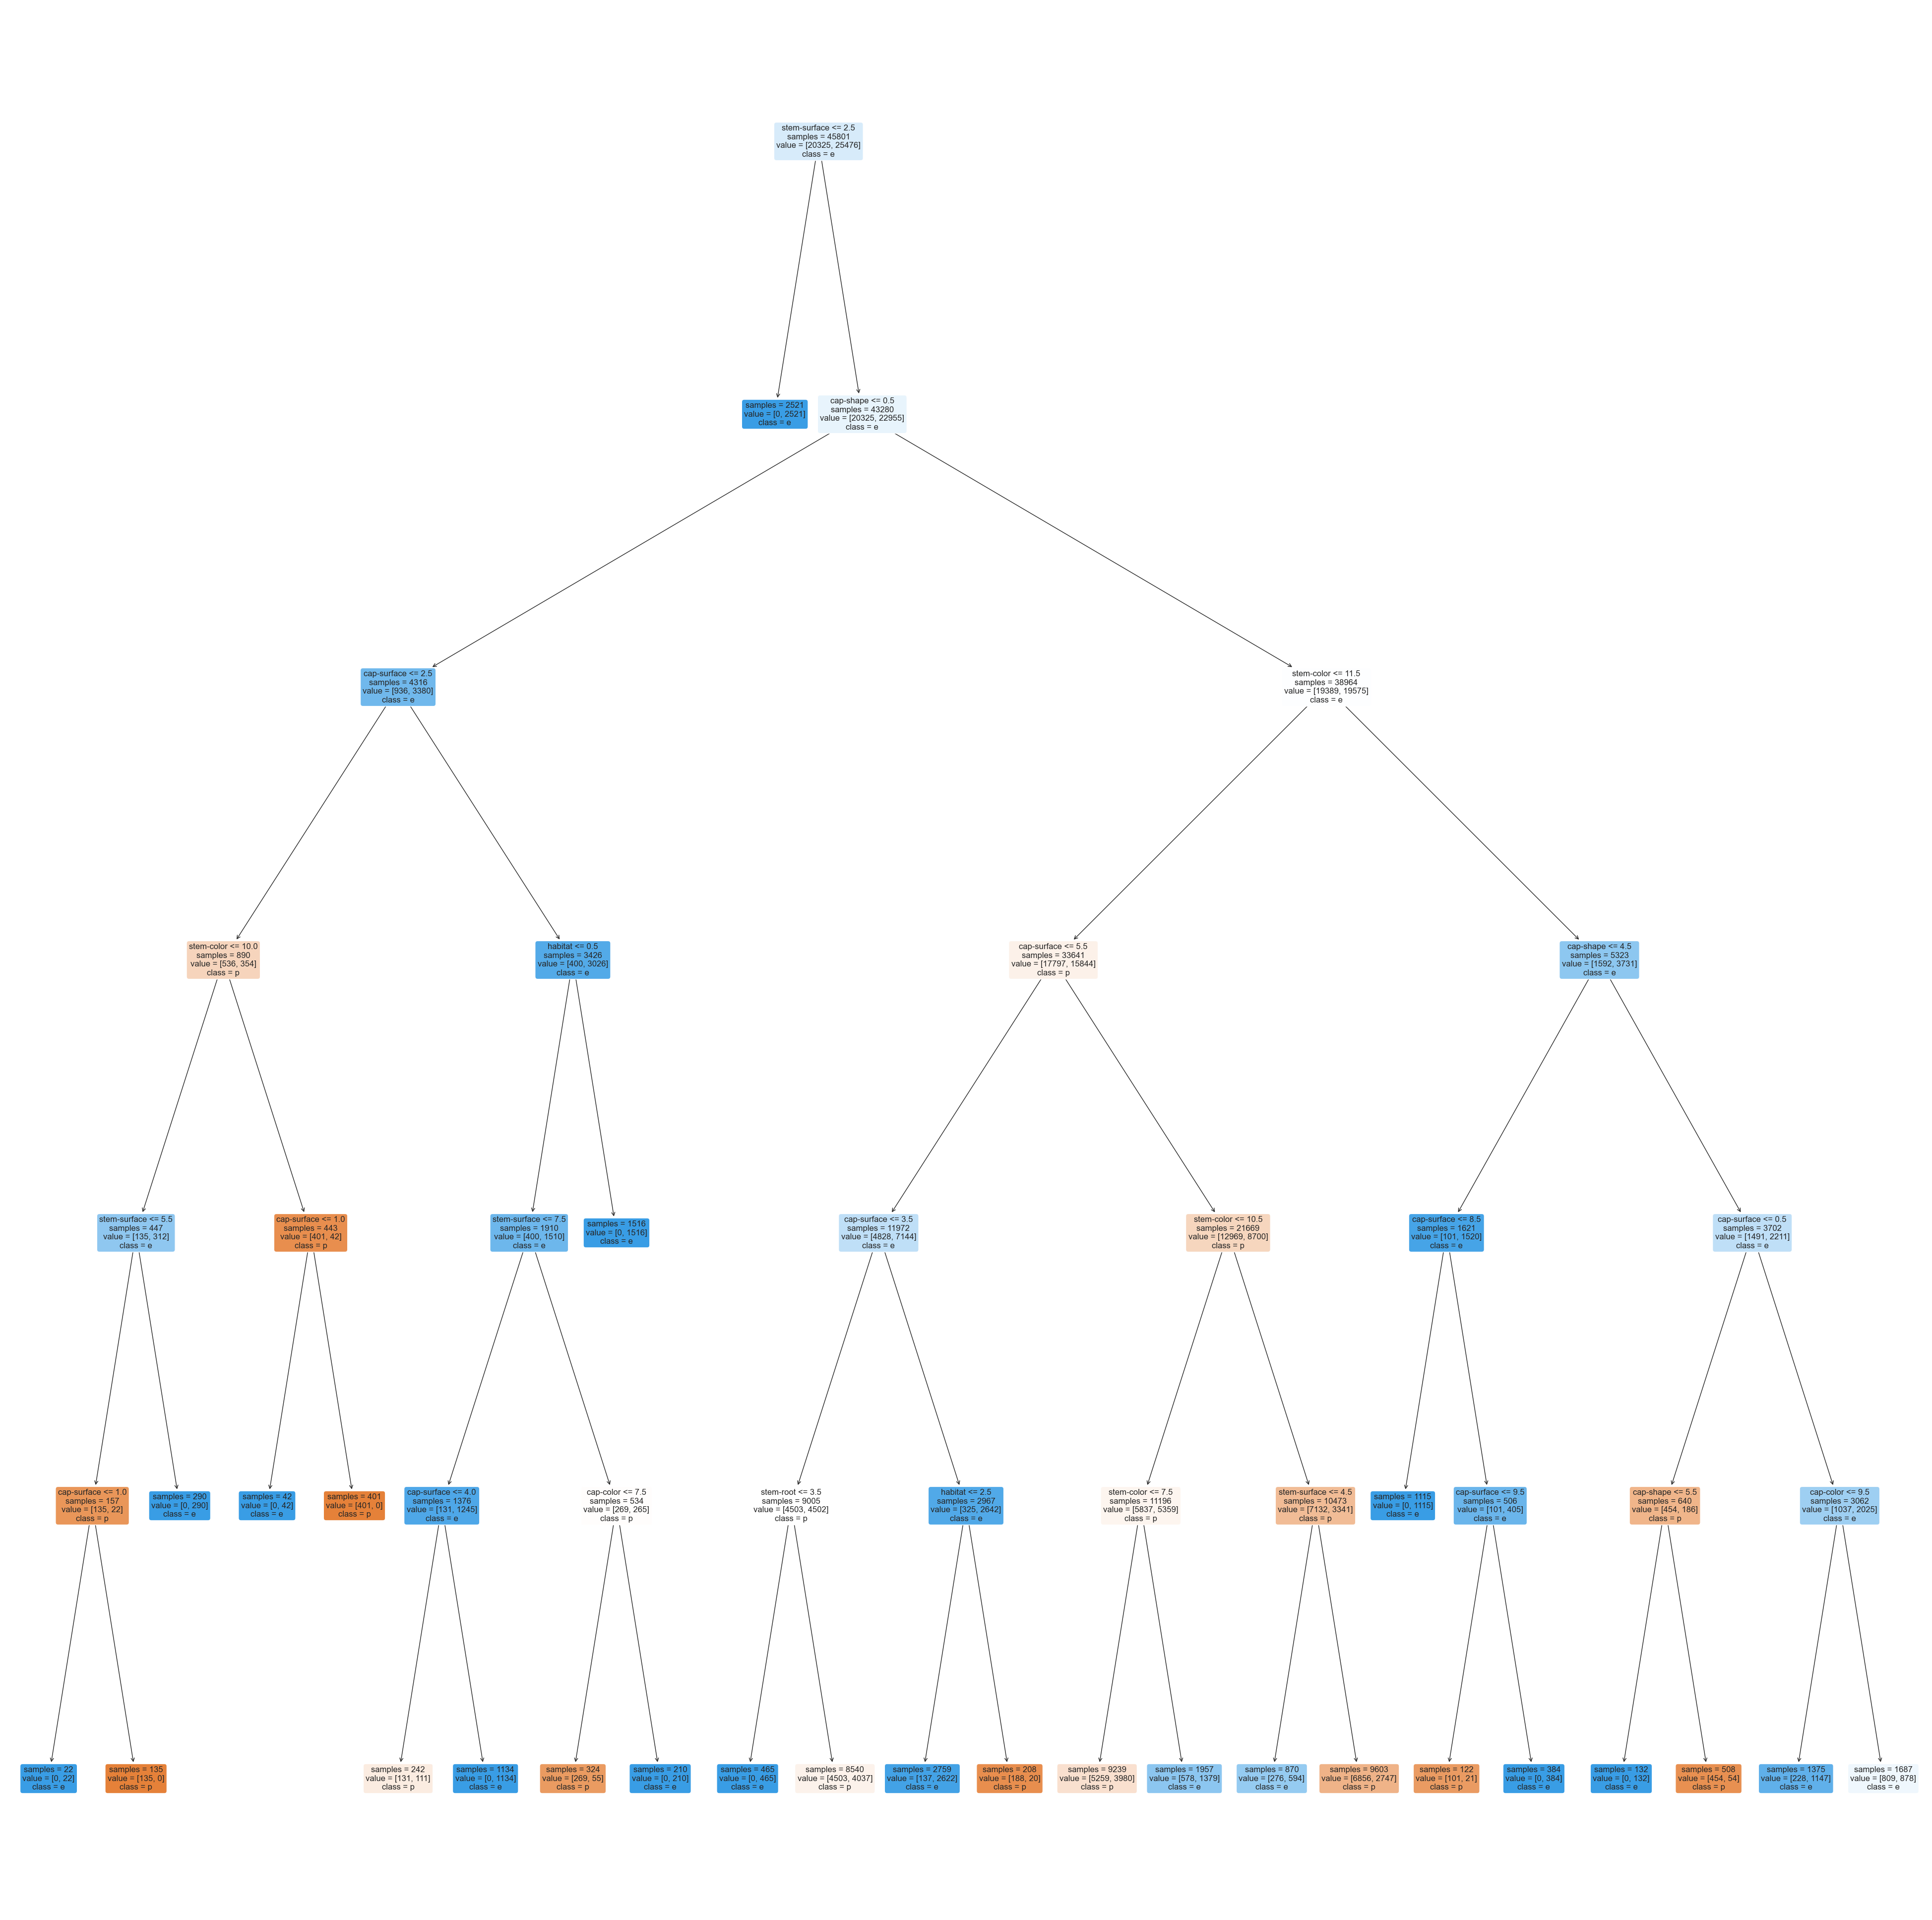

In [621]:
mush_cols = ['cap-shape', 'cap-surface', 'cap-color',
'stem-root', 'stem-surface', 'stem-color', 'habitat', 'season']


from sklearn.tree import plot_tree

# size for our tree figure
fig, ax = plt.subplots(figsize=(50, 50))

# Use sklearn's plot_tree() function
plot_tree(dt,
feature_names = mush_cols,
class_names = ['p', 'e'],
rounded=True,
impurity=False,
filled=True,
ax=ax,
fontsize=12);

In [622]:
from sklearn import metrics

# We use the model to predict the test_encoded data
test_pred_class = dt.predict(x_test)

print(metrics.accuracy_score(y_test, test_pred_class))

0.7132564841498559
